In [221]:
import sympy as sp
import numpy as np

In [337]:
sp.init_printing()

In [338]:
u, v, v0= sp.symbols('u v v0', real=True)

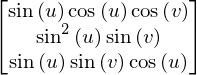

In [478]:
#сфера-7
x = sp.cos(u)*sp.cos(v)*sp.sin(u) 
y = sp.sin(u)*sp.sin(v)*sp.sin(u) 
z = sp.sin(u)*sp.sin(v)*sp.cos(u)
r = sp.Matrix([x, y, z])
r

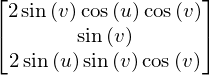

In [515]:
#восьмерка
x = sp.cos(u)*(2*sp.sin(v)*sp.cos(v)) 
y = sp.sin(v)
z = sp.sin(u)*(2*sp.sin(v)*sp.cos(v))
r = sp.Matrix([x, y, z])
r

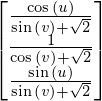

In [489]:
# тор-блюдце
x = sp.cos(u) / (sp.sqrt(2) + sp.sin(v)) 
y = 1 / (sp.sqrt(2) + sp.cos(v)) 
z = sp.sin(u) / (sp.sqrt(2) + sp.sin(v))
r = sp.Matrix([x, y, z])
r

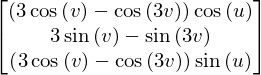

In [573]:
# почка
x = sp.cos(u) *(3 *sp.cos(v) - sp.cos(3 *v)) 
y = 3 *sp.sin(v) - sp.sin(3 * v) 
z =  sp.sin(u) *(3 * sp.cos(v) - sp.cos(3 * v))
r = sp.Matrix([x, y, z])
r

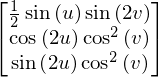

In [193]:
#скрещенный тор
x = sp.sin(u) * sp.sin(2 * v) / 2 #(2+sp.cos(u))*sp.cos(v)
y = sp.cos(2 * u) * sp.cos(v) * sp.cos(v) # (2+sp.cos(u))*sp.sin(v) 
z = sp.sin(2 * u) * sp.cos(v) * sp.cos(v) # sp.sin(u)
r = sp.Matrix([x, y, z])
r

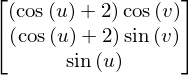

In [592]:
#тор
x = (2+sp.cos(u))*sp.cos(v)
y = (2+sp.cos(u))*sp.sin(v) 
z =  sp.sin(u)
r = sp.Matrix([x, y, z])
r

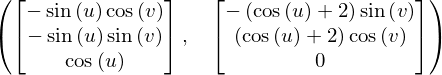

In [593]:
#канонический базис
e_1 = sp.diff(r, u)
e_2 = sp.diff(r, v)
e_1, e_2

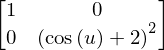

In [594]:
#первая квадратичная форма
first_fund_form = sp.Matrix([[e_1.dot(e_1), e_1.dot(e_2)], [e_2.dot(e_1), e_2.dot(e_2)]])
first_fund_form.simplify()
first_fund_form

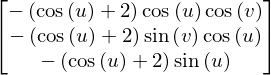

In [595]:
#нормаль в точке
norm = e_1.cross(e_2)
norm.simplify()
#norm = norm / norm.norm()
norm

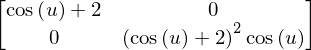

In [596]:
#вторая квадратичная форма
r_u = sp.diff(r, u)
r_v = sp.diff(r, v)
r_uu = sp.diff(r_u, u)
r_uv = sp.diff(r_u, v)
r_vu = sp.diff(r_v, u)
r_vv = sp.diff(r_v, v)
second_fund_form = sp.Matrix([[r_uu.dot(norm), r_uv.dot(norm)], [r_vu.dot(norm), r_vv.dot(norm)]])
second_fund_form.simplify()
second_fund_form

In [597]:
lambda_ = sp.Symbol('\lambda', real=True)
A = second_fund_form - lambda_*first_fund_form
A.simplify()
det = (A).det()
det.simplify()
det

In [598]:
#находим главные кривизны
lambdas = sp.solveset(det, lambda_)

In [599]:
lambda_1 = list(lambdas)[0]
lambda_2 = list(lambdas)[1]
lambda_1.simplify()
lambda_2.simplify()
lambda_1, lambda_2

In [600]:
# a_1, b_1 -- координаты главного направления в каноническом базисе
a_1, b_1 = sp.symbols('a_1 b_1', real=True)

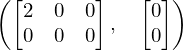

In [601]:
#находим координаты нового базиса
A = (second_fund_form - lambda_1 * first_fund_form)
A.simplify()
b = sp.Matrix([0, 0])
A = A.col_insert(2, b)
A, b

In [602]:
A_1 = sp.linsolve(A, (a_1, b_1))

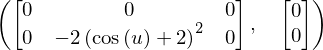

In [603]:
A = (second_fund_form - lambda_2 * first_fund_form)
A.simplify()
b = sp.Matrix([0, 0])
A = A.col_insert(2, b)
A, b

In [604]:
A_2 = sp.linsolve(A, (a_1, b_1))

In [605]:
A_1, A_2

In [606]:
func_1 = sp.lambdify((a_1, b_1), A_1)
func_2 = sp.lambdify((a_1, b_1), A_2)
A_1 = list(func_1(1, 1))[0]
A_2 = list(func_2(1, 1))[0]
A_1, A_2

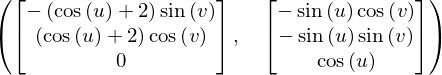

In [607]:
#находим главные направления
H_1 = A_1[0] * e_1 + A_1[1] * e_2
H_2 = A_2[0] * e_1 + A_2[1] * e_2
H_1, H_2

In [608]:
# возвращает главное направление, соответствующее минимальной главной кривизне
# def return_min_h():
#     if lambda_1 is sp.Min(lambda_1, lambda_2): 
#         return H_1
#     else:
#         return H_2

In [609]:
f = sp.acos(H_1.dot(e_1) / ((H_1).norm() * e_1.norm()))
f.simplify()